In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
pd.set_option('display.max_columns', None) # Displaying hidden columns

In [3]:
hotel= pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel.shape

(119390, 32)

In [5]:
# Identifying Depend and independ variables
y = hotel['is_canceled']
X = hotel.drop(columns=['is_canceled', 'company', 'reservation_status_date'])

In [6]:
#Counting how many 'Yes' and 'No' values are there
X = pd.DataFrame(X)
print(Counter(y))

Counter({0: 75166, 1: 44224})


# Exploratory Data Analysis(EDA)

In [7]:
print("Column Names:")
print(X.columns)

Column Names:
Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')


In [8]:
print("\nData Types:")
print(X.dtypes)


Data Types:
hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list 

In [9]:
#Checking the missing values
print("\nMissing Values:")
print(X.isnull().sum())


Missing Values:
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type          

In [10]:
# Imputation
def handle_missing_values(X):
    for column in X.columns:
        if X[column].dtype == 'float64':
            mean_value = X[column].mean()
            X[column].fillna(mean_value, inplace=True)
        elif X[column].dtype == 'object':
            mode_value = X[column].mode()[0]
            X[column].fillna(mode_value, inplace=True)
    return X

X = handle_missing_values(X)
X.isnull().sum()

/tmp/ipykernel_18/854630301.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(mode_value, inplace=True)
/tmp/ipykernel_18/854630301.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

so our data set has 

In [11]:
# Define numerical features
X_numerical = X.select_dtypes(include=['float64','int64'])
X_numerical

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,86.693382,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,86.693382,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,86.693382,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.000000,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.000000,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.000000,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.000000,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.000000,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.000000,0,104.40,0,0


In [12]:
# Define Categorical features
X_categorical = X.select_dtypes(include=['object'])
X_categorical

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


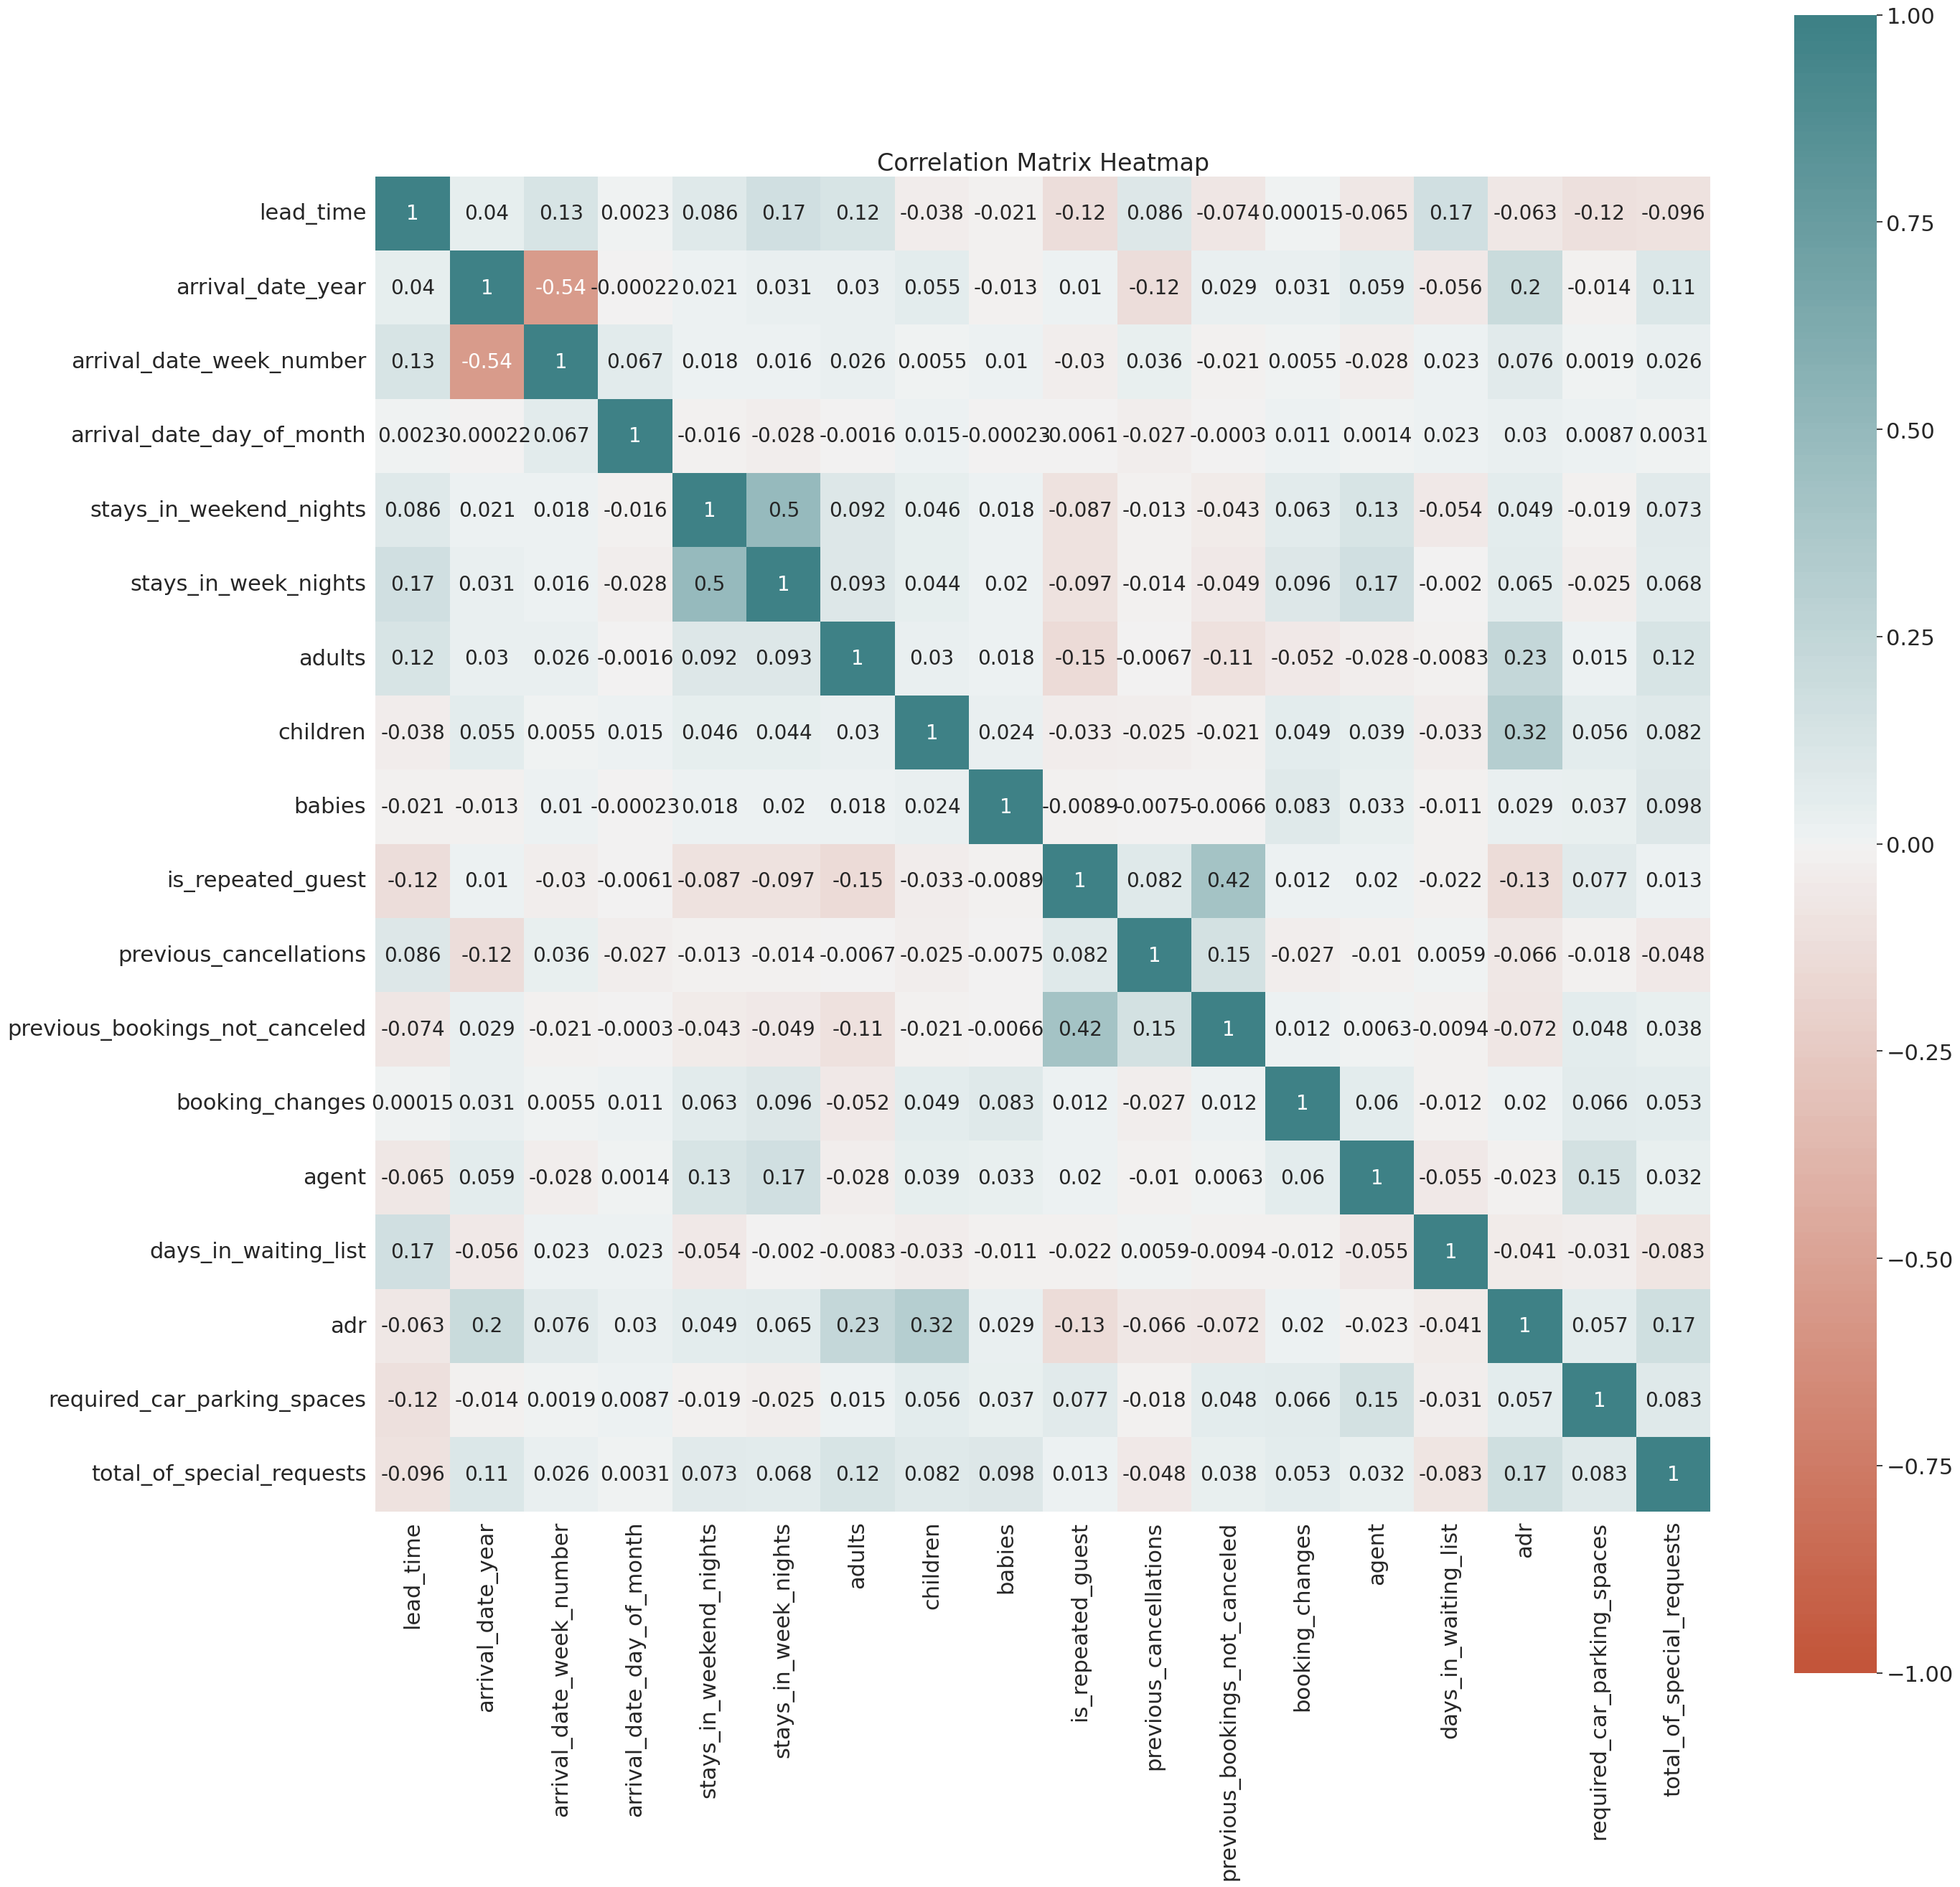

In [13]:
# Plot correlation matrix
cormat = X_numerical.corr()

plt.figure(figsize=(30, 30))
sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True, annot=True, annot_kws={'size': 20}
)
plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.show()

As we can observe there is no high correlation among features so will leave it as it is

Class Counts:
is_canceled
0    75166
1    44224
Name: count, dtype: int64


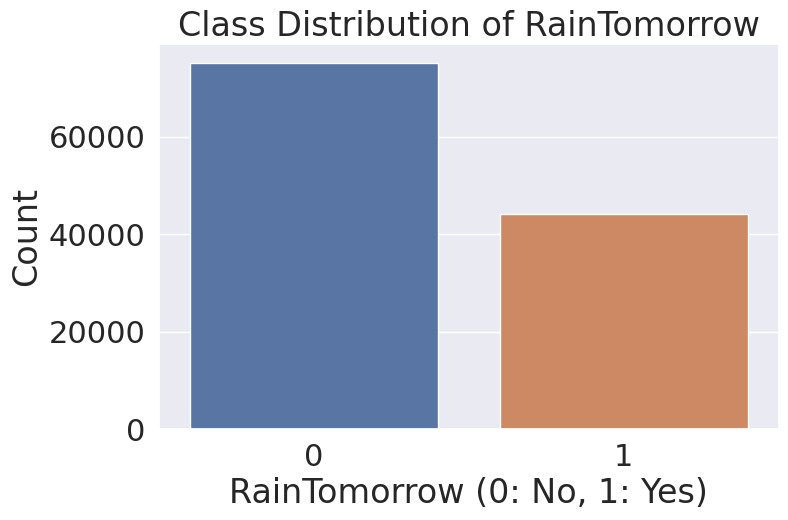

In [14]:
#Count the classes
#Count the frequency of values corresponding to different categories
class_counts = y.value_counts()

# Display the count of each class
print("Class Counts:")
print(class_counts)

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='RainTomorrow', data=pd.DataFrame({'RainTomorrow': y}))
plt.title('Class Distribution of RainTomorrow')
plt.xlabel('RainTomorrow (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

so our dataset has 119390 rows and 32 columns

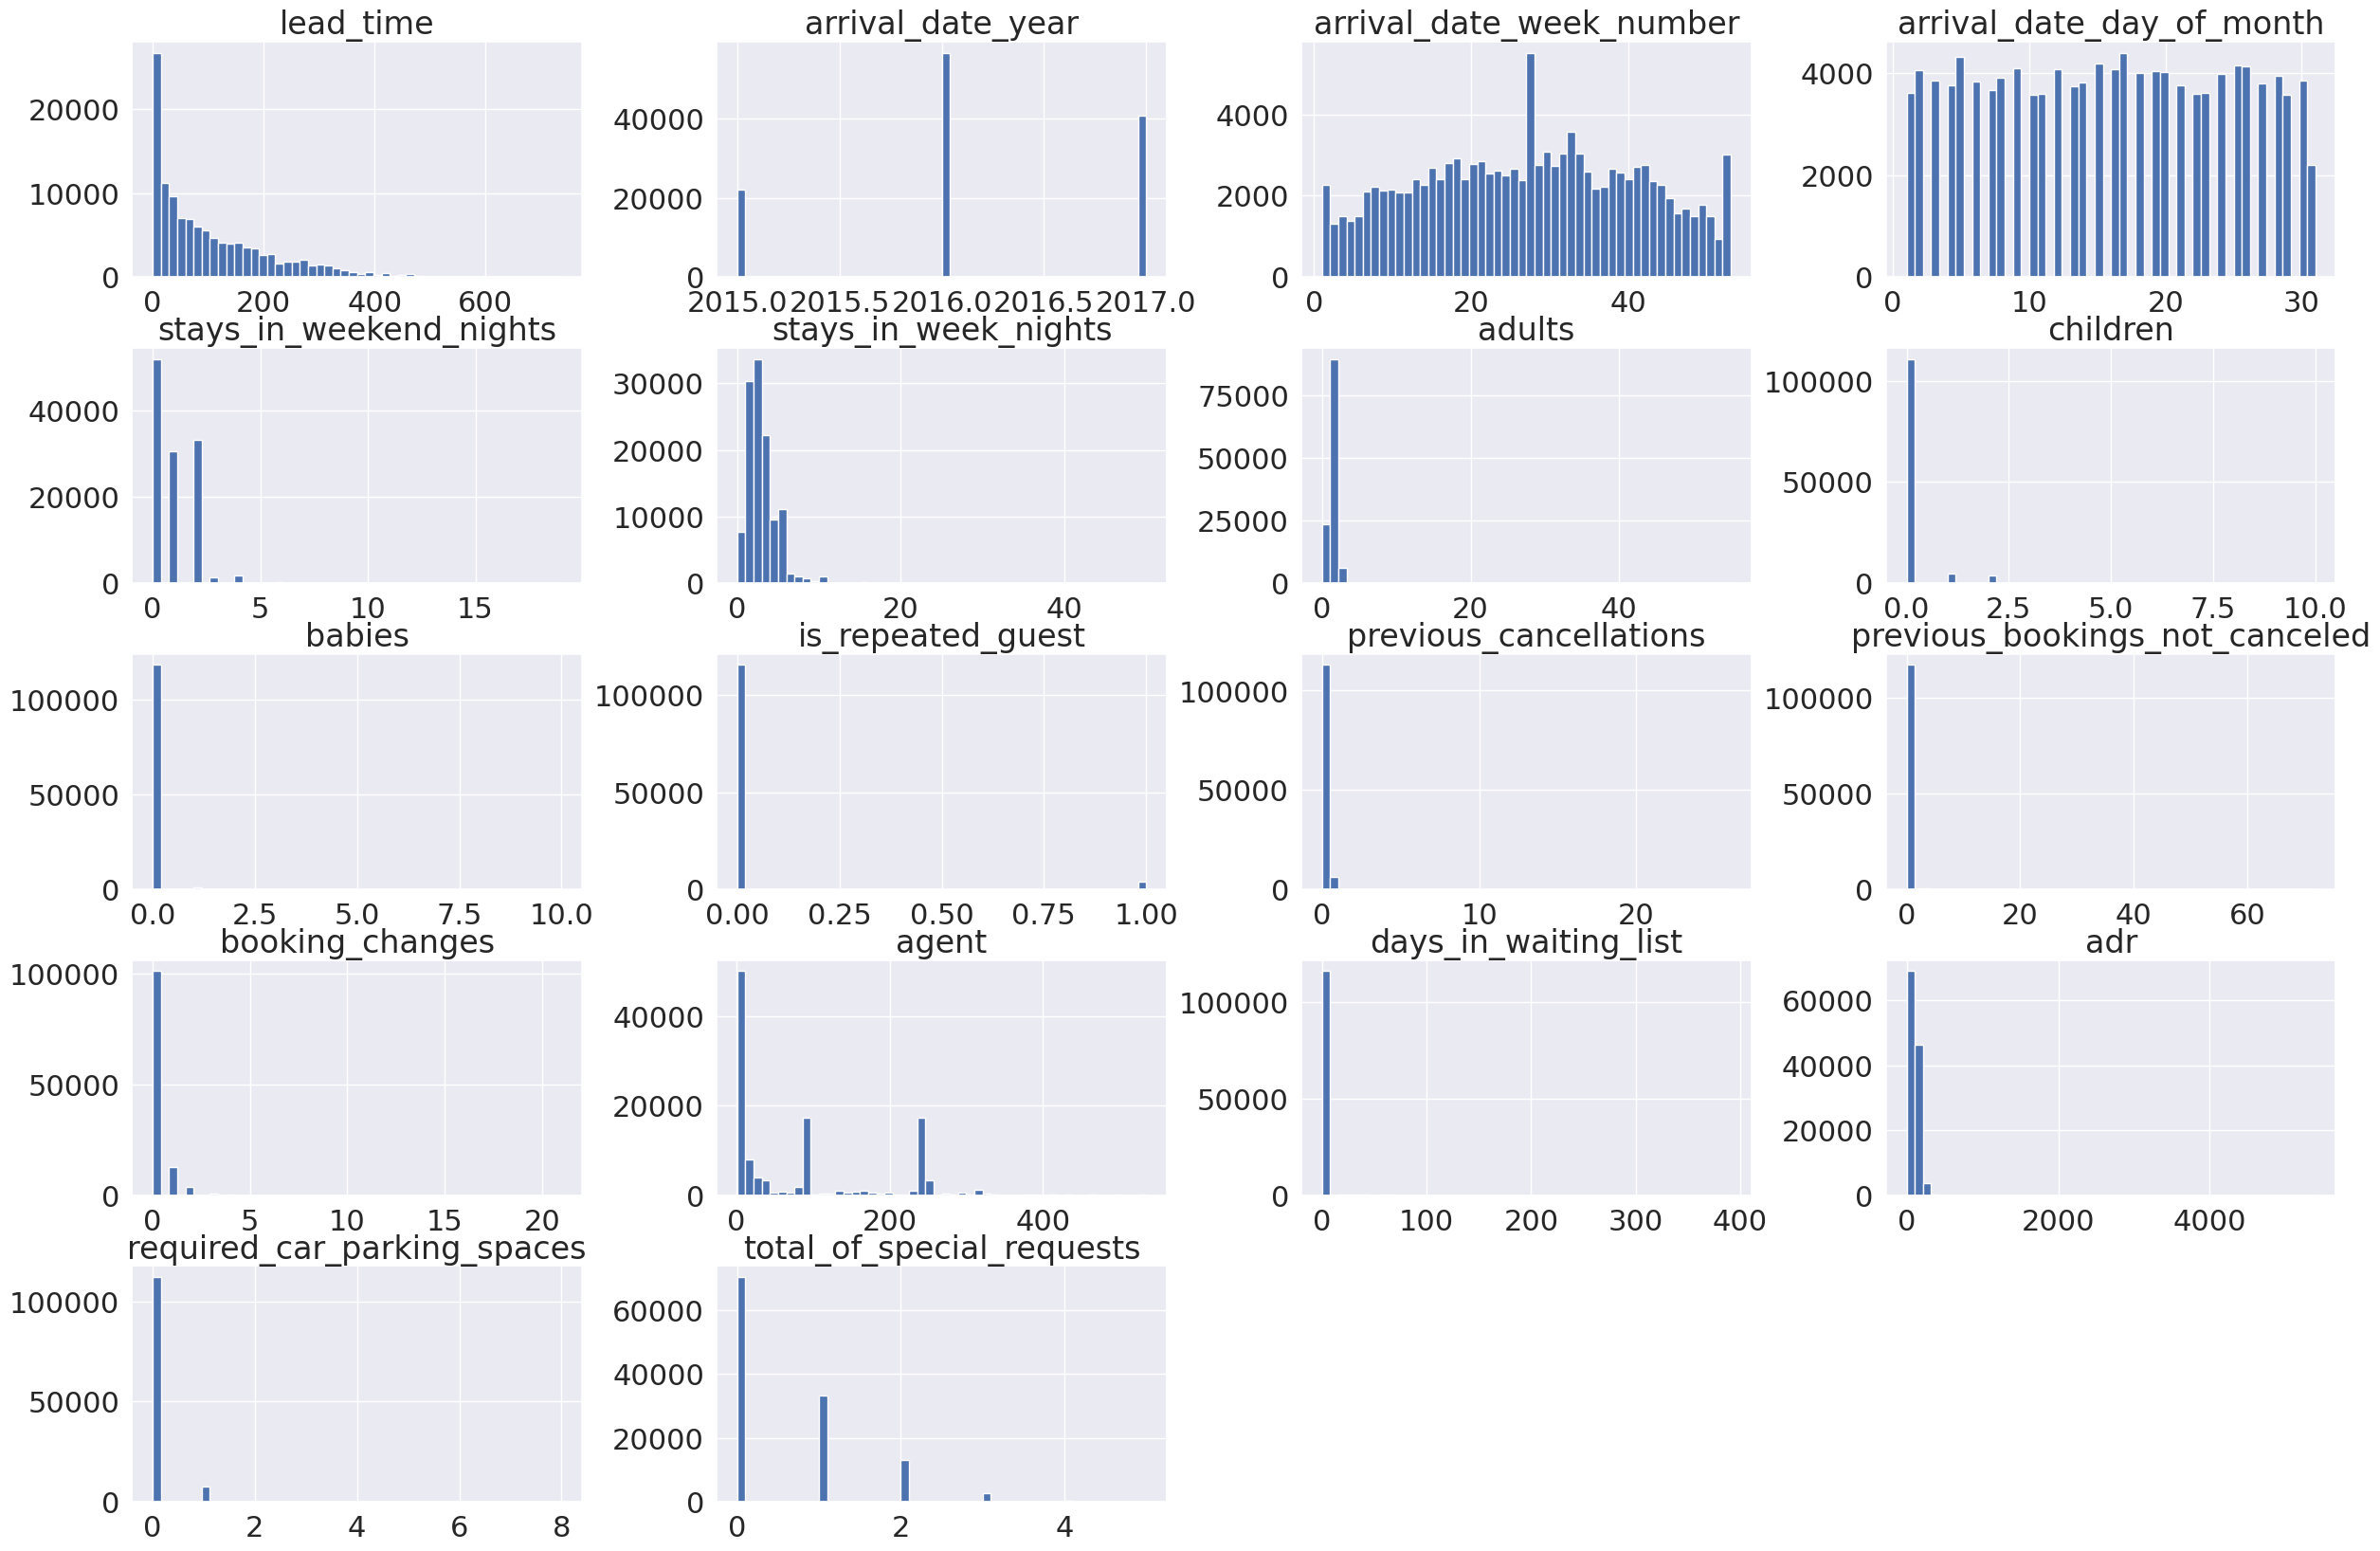

In [15]:
#plot histograms
X.hist(bins=50, figsize=(30,20))
plt.show()

# Feature scaling & dataset split

In [16]:
num_cols = X.dtypes[X.dtypes !='object'].index.to_list()

In [17]:
#Extracting the categorical columns
cat_cols = []
for col in X.columns:
    if col not in num_cols:
        cat_cols.append(col)

In [18]:
#Slicing the dataframe based on the column lists
X_num = X[num_cols]
X_cat = X[cat_cols]

In [19]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [20]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns= num_cols)

In [21]:
X_scaled = pd.concat([X_num_scaled, X_cat], axis=1)
X_scaled

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,2.227051,-1.634768,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,4.260101,1.380837e-16,-0.131924,-2.015038,-0.254873,-0.720694,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,5.923385,-1.634768,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,5.793131,1.380837e-16,-0.131924,-2.015038,-0.254873,-0.720694,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,-0.907814,-1.634768,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,1.380837e-16,-0.131924,-0.530935,-0.254873,-0.720694,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,-0.851667,-1.634768,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,2.111519e+00,-0.131924,-0.530935,-0.254873,-0.720694,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,-0.842309,-1.634768,-0.012141,-1.685297,-0.928890,-0.262174,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,1.489646e+00,-0.131924,-0.075810,-0.254873,0.540666,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.758089,1.192195,0.575875,1.617366,1.073895,1.309924,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,2.986029e+00,-0.131924,-0.112616,-0.254873,-0.720694,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
119386,-0.018822,1.192195,0.575875,1.731251,1.073895,1.309924,1.974242,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-7.549290e-01,-0.131924,2.445779,-0.254873,1.802026,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
119387,-0.655153,1.192195,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-7.549290e-01,-0.131924,1.105733,-0.254873,4.324746,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
119388,0.046682,1.192195,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,2.241289e-02,-0.131924,0.050833,-0.254873,-0.720694,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


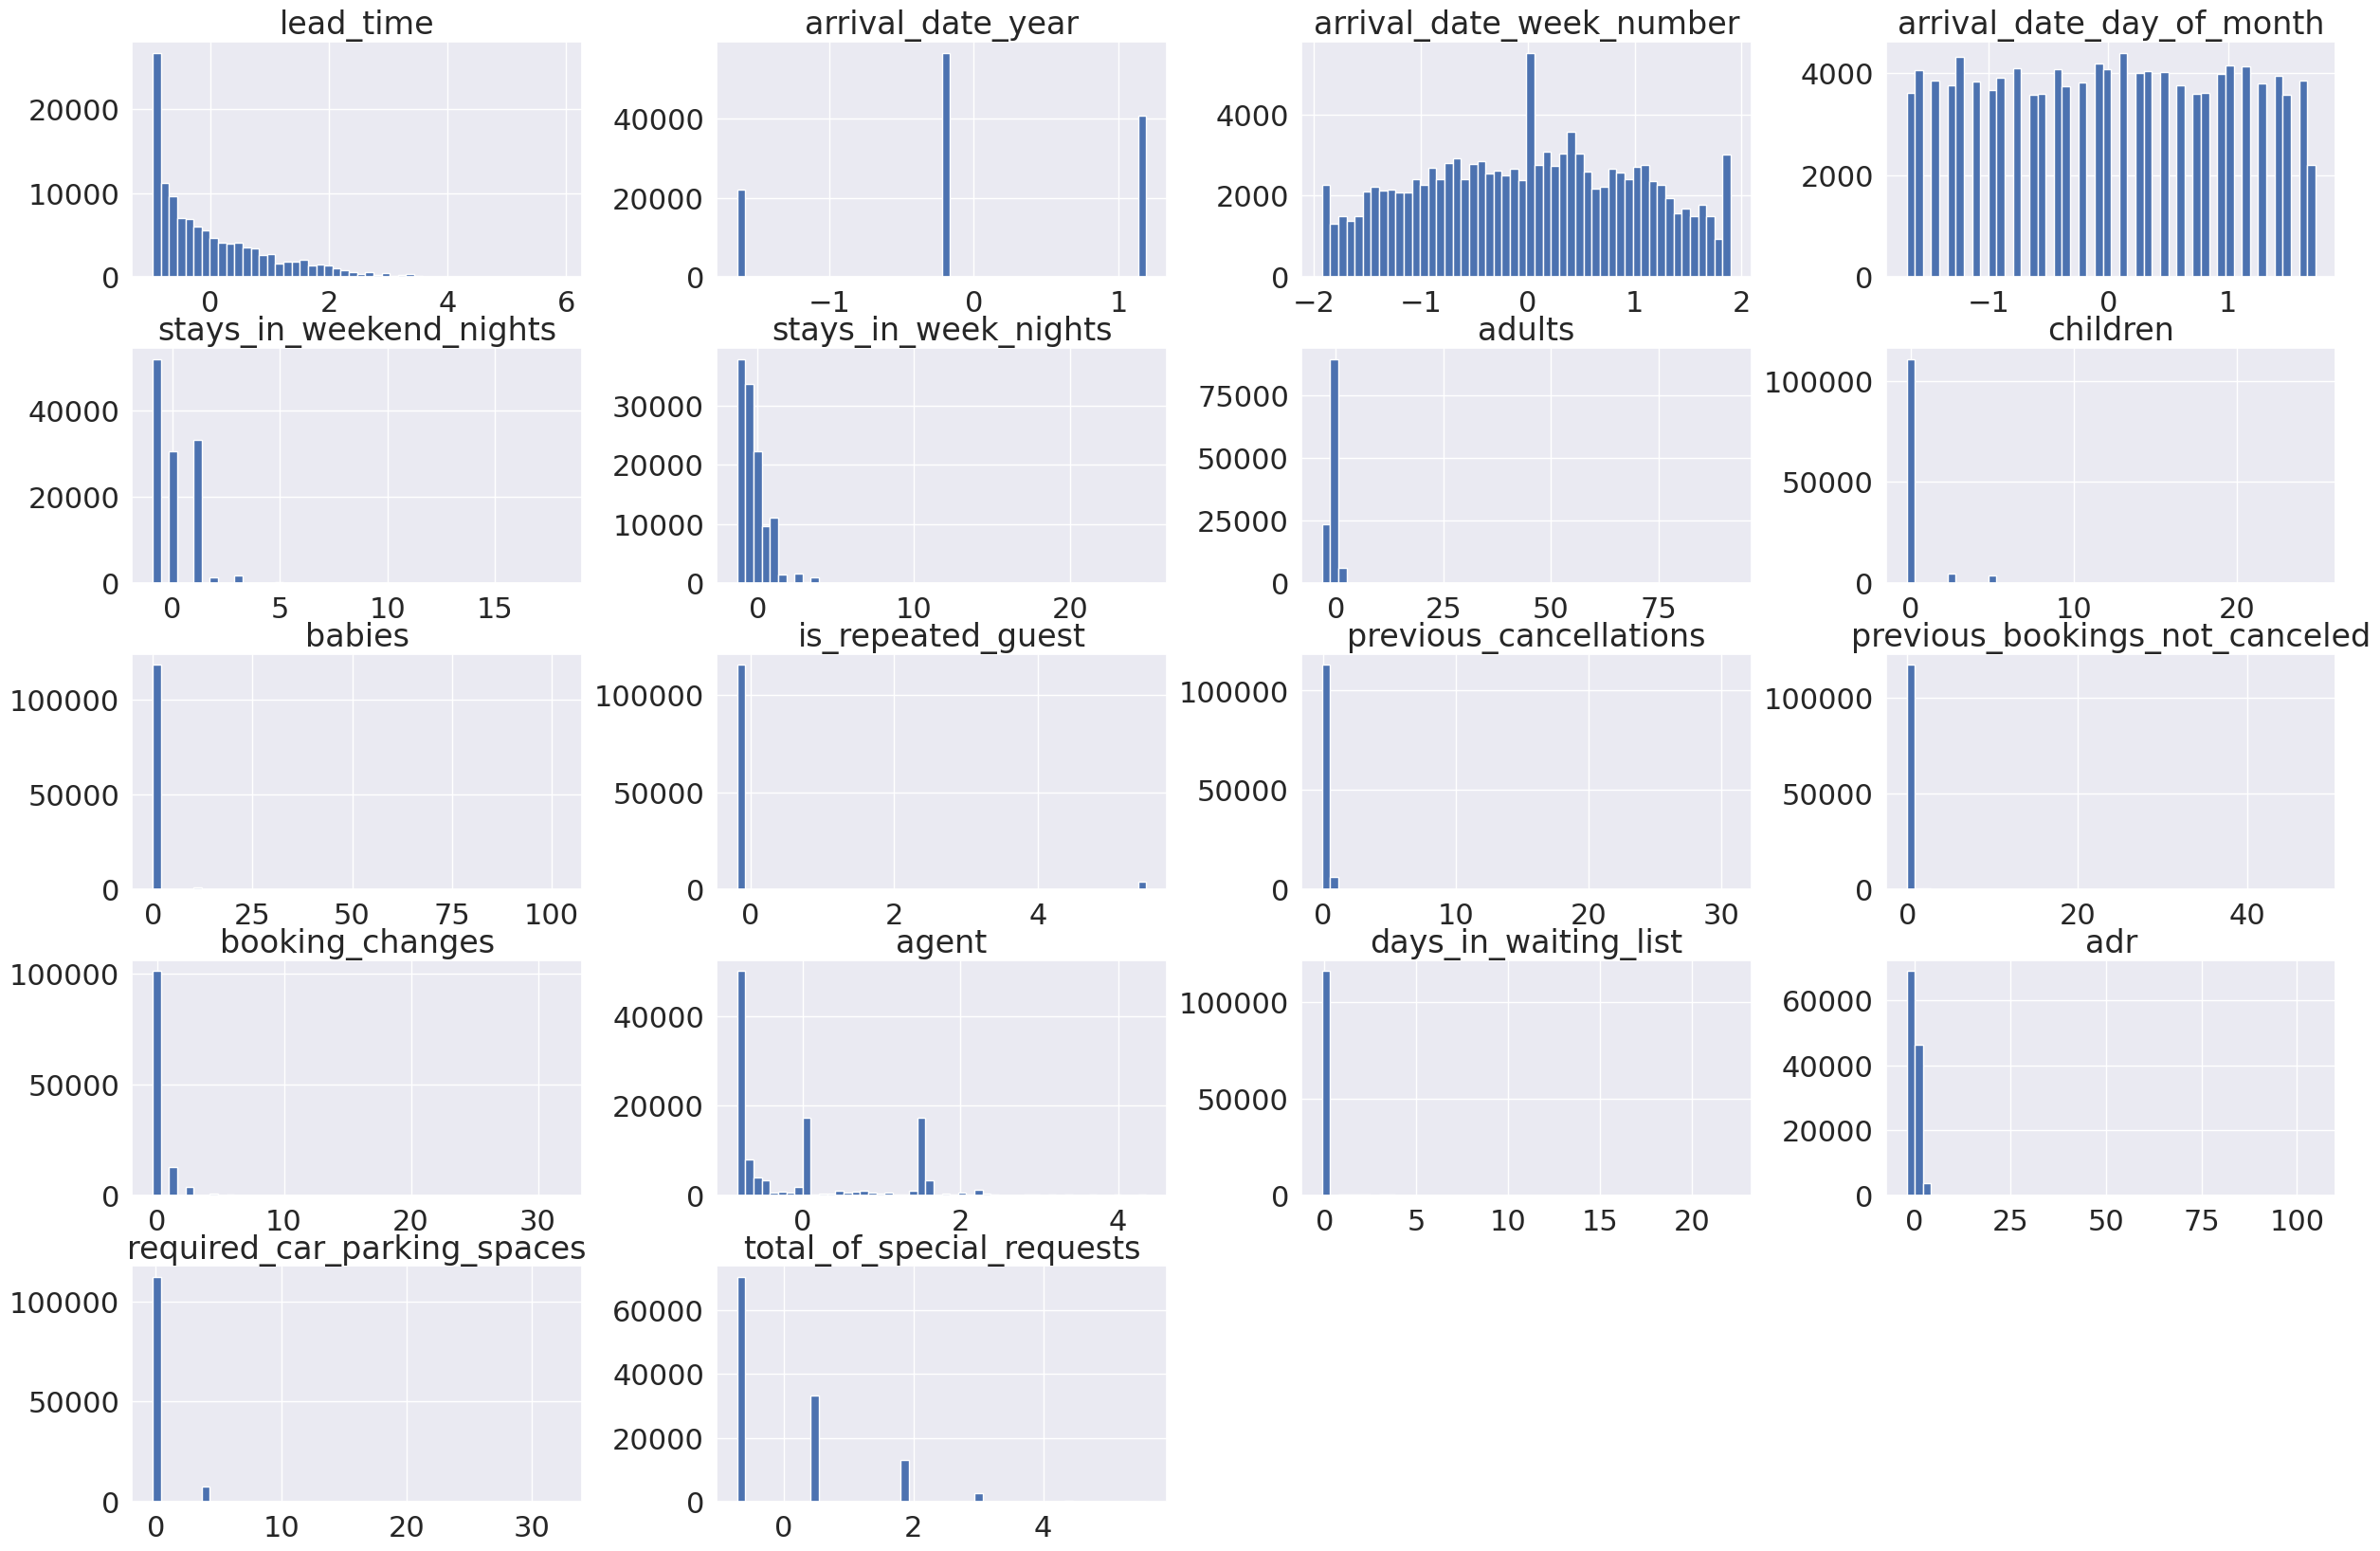

In [22]:
X_scaled.hist(bins=50, figsize=(30,20))
plt.show()

In [23]:
# Split the dataset into training, validation, and test sets. 60%-20%-20%